This program is intended to decide on the features that are important for marketing cars 

In [1]:
#
# import the libraries for reading from file into dataframes 
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

car_df = pd.read_csv('CarPrice_Assignment.csv')

car_df.info()
#none of the columns are having null value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [2]:
#cleaning of the data let's start to convert non numeric data into numeric 
car_df.describe()
#CarName  fueltype aspiration doornumber carbody drivewheel enginelocation enginetype cylindernumber fuelsystem
#above mentioned are the categorical variable columns 

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


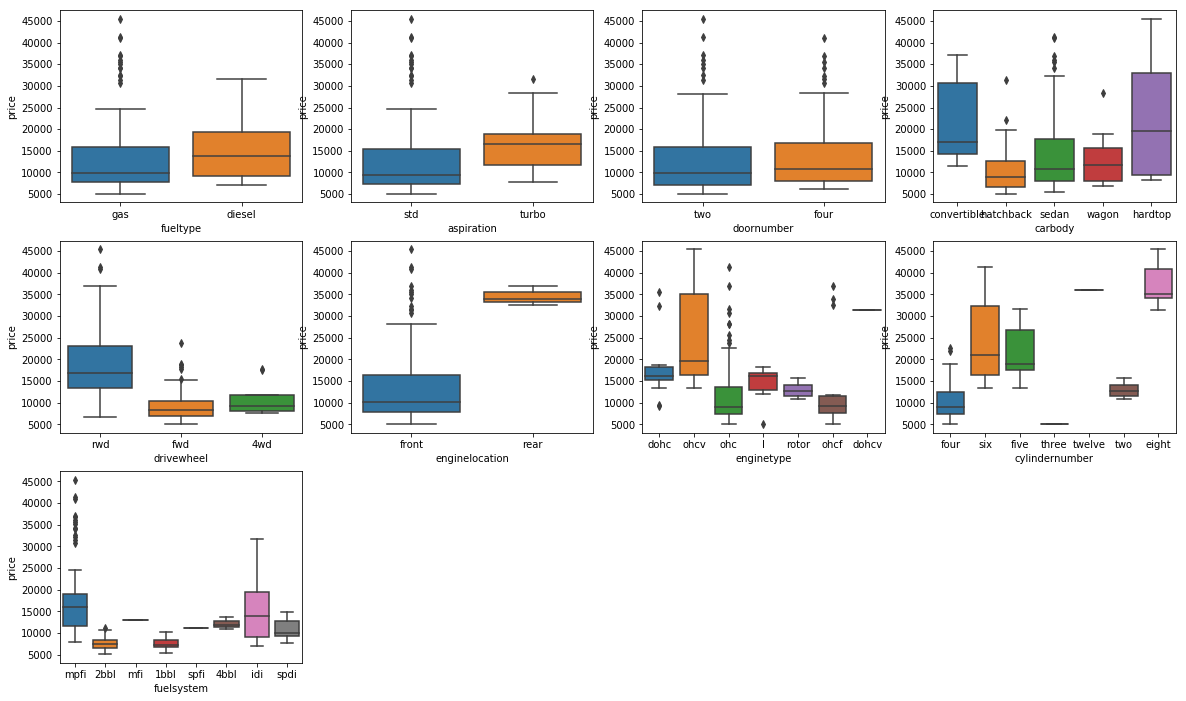

In [3]:
#visualize the categorical variables 
plt.figure(figsize=(20, 12))
plt.subplot(3,4,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_df)
plt.subplot(3,4,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_df)
plt.subplot(3,4,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df)
plt.subplot(3,4,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_df)
plt.subplot(3,4,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_df)
plt.subplot(3,4,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df)
plt.subplot(3,4,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_df)
plt.subplot(3,4,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df)
plt.subplot(3,4,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df)
plt.show()     


**The Below process is to clean the data and convert the categorical variables into neumeric format**

In [4]:
#Fueltype, aspiration, doornumber, enginelocation can be converted into numerical 
#cylindernumber can also be converted into nuemerical 

#fueltype
ftype = pd.get_dummies(car_df['fueltype'], drop_first = True)
car_df = pd.concat([car_df, ftype], axis = 1)
car_df.drop(['fueltype'], axis = 1, inplace = True)
#ftype.info() --> adds a new column indiacting fuel type as this has only 2 options replaced the existing column 

In [5]:
# apsiration
aspr = pd.get_dummies(car_df['aspiration'], drop_first = True)
car_df = pd.concat([car_df, aspr], axis = 1)
car_df.drop(['aspiration'], axis = 1, inplace = True)
#aspr.info() --> adds a new column indiacting apsiration as this has only 2 options replaced the existing column 

In [6]:
#doornumber conver into the neumeric format 

def door_num(x):
    if x == 'two':
        return 2
    elif x == 'four':
        return 4

car_df.doornumber = car_df.doornumber.apply(door_num)

In [7]:
#enginelocation
elocation = pd.get_dummies(car_df['enginelocation'], drop_first = True)
car_df = pd.concat([car_df, elocation], axis = 1)
car_df.drop(['enginelocation'], axis = 1, inplace = True)
#elocation.info()

In [8]:
#drivewheel
dwheel = pd.get_dummies(car_df['drivewheel'], drop_first = True)
car_df = pd.concat([car_df, dwheel], axis = 1)
car_df.drop(['drivewheel'], axis = 1, inplace = True)
#dwheel.info()

In [9]:
#enginetype
etype = pd.get_dummies(car_df['enginetype'], drop_first = True)
car_df = pd.concat([car_df, etype], axis = 1)
car_df.drop(['enginetype'], axis = 1, inplace = True)
#etype.info()

In [10]:
#cylindernumber  modify the format into numerical 
def cyl_num(x):
    if x == 'two':
        return 2
    elif x == 'three':
        return 3
    elif x == 'four':
        return 4
    elif x == 'five':
        return 5
    elif x == 'six':
        return 6
    elif x == 'eight':
        return 8
    elif x == 'twelve':
        return 12
car_df.cylindernumber = car_df.cylindernumber.apply(cyl_num)

In [11]:
#carbody
cbody = pd.get_dummies(car_df['carbody'], drop_first = True)
#print(cbody.sum())
car_df = pd.concat([car_df, cbody], axis = 1)
car_df.drop(['carbody'], axis = 1, inplace = True)
#cbody.info()

In [12]:
#fuelsystem
ftype = pd.get_dummies(car_df['fuelsystem'], drop_first = True)
#print(ftype.sum())
car_df = pd.concat([car_df, ftype], axis = 1)
car_df.drop(['fuelsystem'], axis = 1, inplace = True)
#ftype.info()

In [13]:
#considering requirement of taking only company name for regression 
def find_company(x): 
    return x.split()[0]

car_df.CarName = car_df.CarName.apply(find_company)
#car_df.CarName.unique()

In [14]:
#correct the spelling mistakes and duplicate entries 
def correct_name(x):
    if x == 'alfa-romero':
        return 'alfaromeo'
    elif x == 'maxda':
        return 'mazda'
    elif x=='Nissan':
        return 'nissan'
    elif x== 'porcshce':
        return 'porsche'
    elif x== 'toyouta':
        return 'toyota'
    elif( x == 'vokswagen' or x == 'vw'):
        return 'volkswagen'
    else:
        return x
    
car_df.CarName = car_df.CarName.apply(correct_name)
#car_df.CarName.unique()

cname = pd.get_dummies(car_df['CarName'], drop_first = True)
car_df = pd.concat([car_df, cname], axis = 1)
car_df.drop(['CarName'], axis = 1, inplace = True)

In [15]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
doornumber          205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
gas                 205 non-null uint8
turbo               205 non-null uint8
rear                205 non-null uint8
fwd                 205 non-null uint8
rwd                 2

**Let us now split the data and for applying the regression**

In [16]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

**leaving aside the yes-no and other categorical columns, apply scaling in training data set on other columns**

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
col_to_scale = ['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_train[col_to_scale] = scaler.fit_transform(df_train[col_to_scale])

C:\Users\maddp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\maddp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


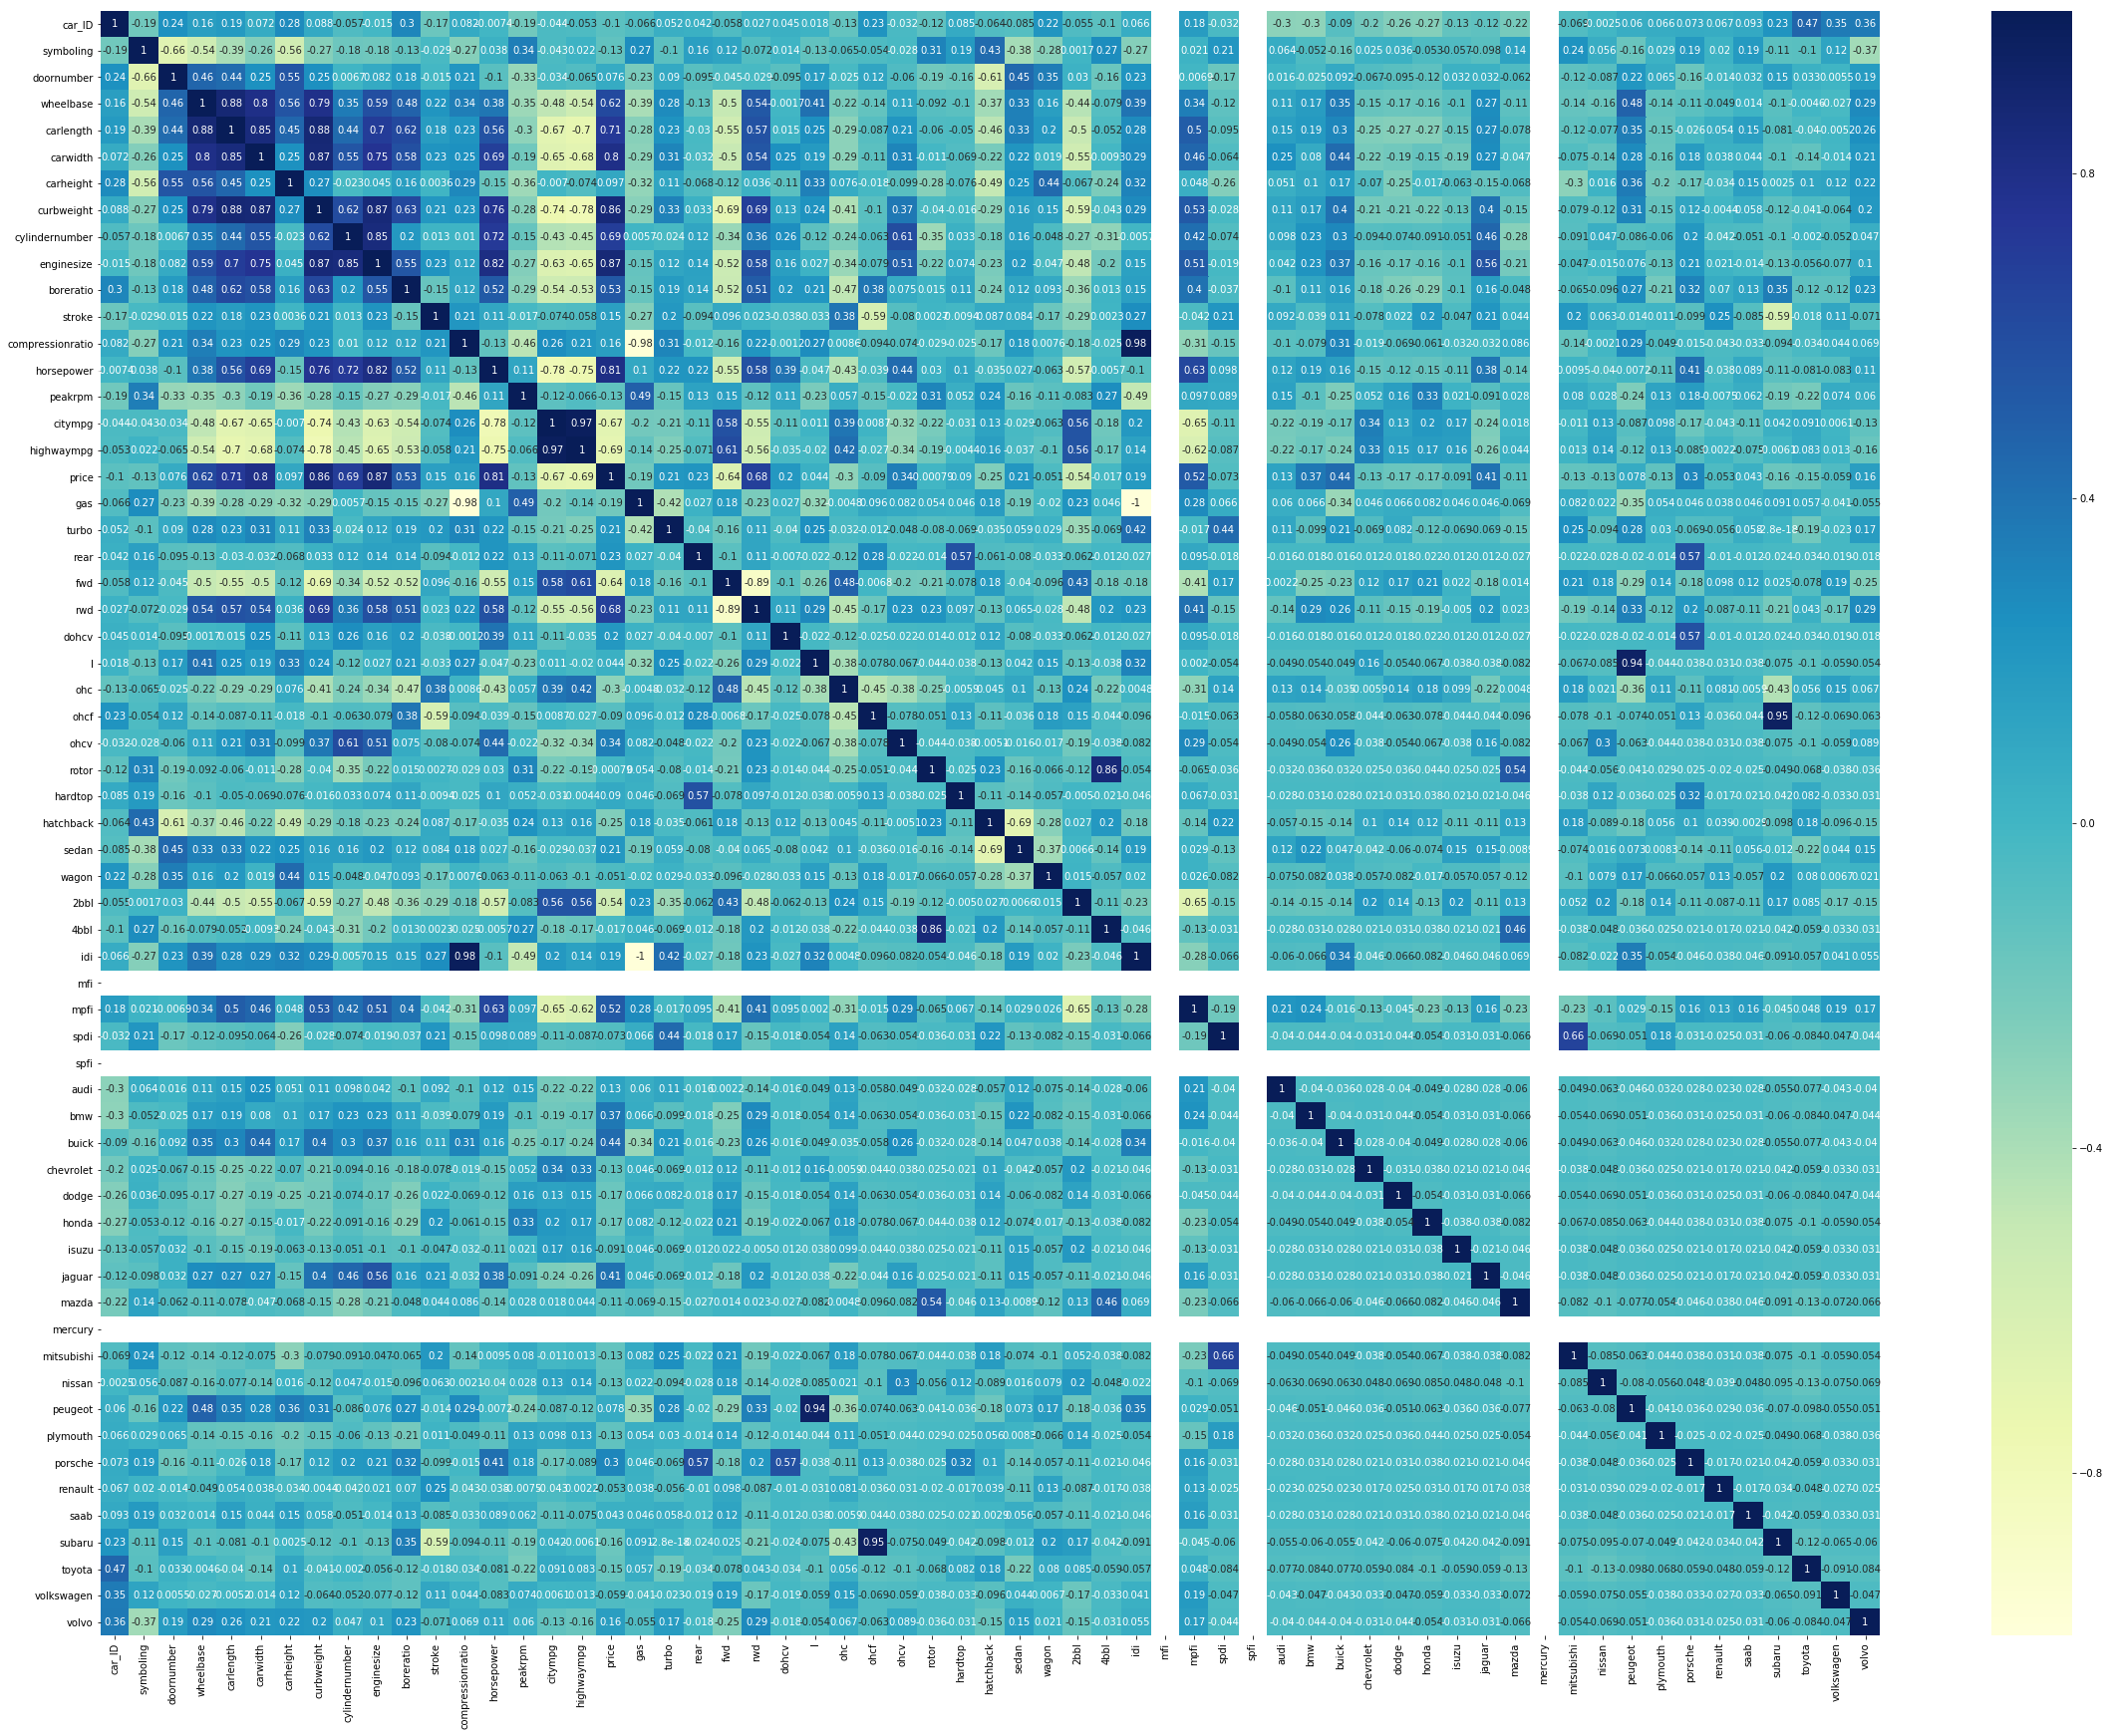

In [19]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40,30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**From the above heat map we can see that the price has good correlation to many featurs and also is not correlated to many of them we have to apply the next steps to see how we can infer more** 

In [20]:
y_train = df_train.pop('price')
X_train = df_train

**Let's first try the RFE method and see how the features are valued**

In [21]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [22]:
# Apply the Linear Regression to the training set 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [23]:
#List the features, support status and ranking 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 2),
 ('symboling', False, 38),
 ('doornumber', False, 36),
 ('wheelbase', False, 18),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 14),
 ('peakrpm', False, 7),
 ('citympg', False, 28),
 ('highwaympg', False, 11),
 ('gas', True, 1),
 ('turbo', False, 16),
 ('rear', True, 1),
 ('fwd', False, 35),
 ('rwd', False, 32),
 ('dohcv', True, 1),
 ('l', False, 13),
 ('ohc', False, 23),
 ('ohcf', False, 31),
 ('ohcv', False, 34),
 ('rotor', True, 1),
 ('hardtop', False, 20),
 ('hatchback', False, 19),
 ('sedan', False, 21),
 ('wagon', False, 22),
 ('2bbl', False, 30),
 ('4bbl', False, 27),
 ('idi', True, 1),
 ('mfi', False, 39),
 ('mpfi', False, 33),
 ('spdi', False, 37),
 ('spfi', False, 40),
 ('audi', False, 29),
 ('bmw', True, 1),
 ('buick', False, 26),
 ('chevro

In [24]:
#list the features with support status true
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'gas', 'rear', 'dohcv', 'rotor', 'idi',
       'bmw', 'mitsubishi', 'peugeot', 'plymouth', 'renault', 'subaru',
       'toyota', 'volkswagen'],
      dtype='object')

In [25]:
# create a dataframe with the RFE selected featurs and fit them using stats model
# add a constant to the model and then check the summary 
X_train_rfe = X_train[col]

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     99.51
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           3.20e-65
Time:                        11:18:31   Log-Likelihood:                 216.83
No. Observations:                 143   AIC:                            -393.7
Df Residuals:                     123   BIC:                            -334.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2495      0.079  

In [26]:
# finding VIF for the stats model we just prepared 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\maddp\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\maddp\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
8,gas,inf
12,idi,inf
7,compressionratio,63.780000
4,enginesize,48.790000
3,cylindernumber,27.890000
2,curbweight,12.970000
5,boreratio,10.530000
1,carwidth,5.630000
6,stroke,5.360000
18,subaru,2.470000


In [27]:
#start to iterate by removing the feature with VIF value higher than 5 
X_train_rfe_1 = X_train_rfe.drop('gas',axis=1)
X_train_rfe_1 = sm.add_constant(X_train_rfe_1)
lm_1 = sm.OLS(y_train,X_train_rfe_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     99.51
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           3.20e-65
Time:                        11:18:31   Log-Likelihood:                 216.83
No. Observations:                 143   AIC:                            -393.7
Df Residuals:                     123   BIC:                            -334.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2143      0.074  

In [28]:
#plot VIF again after removing the feature to see the new status
vif_n_idi = pd.DataFrame()
X = X_train_rfe_1
vif_n_idi['Features'] = X.columns
vif_n_idi['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_n_idi['VIF'] = round(vif_n_idi['VIF'], 2)
vif_n_idi = vif_n_idi.sort_values(by = "VIF", ascending = False)
vif_n_idi

,Features,VIF
0,const,239.46
11,idi,70.31
7,compressionratio,63.78
4,enginesize,48.79
3,cylindernumber,27.89
2,curbweight,12.97
5,boreratio,10.53
1,carwidth,5.63
6,stroke,5.36
17,subaru,2.47


In [29]:
#remove the feature which is highest in VIF results and find the stats summary again 
X_train_rfe_2 = X_train_rfe_1.drop('idi',axis=1)
X_train_rfe_2 = sm.add_constant(X_train_rfe_2)
lm_2 = sm.OLS(y_train,X_train_rfe_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     101.3
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           3.97e-65
Time:                        11:18:31   Log-Likelihood:                 213.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     124   BIC:                            -333.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1534      0.070  

In [30]:
#check for VIF after dropping feature for next iteration 
vif_1 = pd.DataFrame()
X = X_train_rfe_2
vif_1['Features'] = X.columns
vif_1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
0,const,208.59
4,enginesize,48.74
3,cylindernumber,27.33
2,curbweight,11.34
5,boreratio,10.45
1,carwidth,5.63
6,stroke,5.06
16,subaru,2.26
9,dohcv,1.82
13,peugeot,1.60


In [31]:
#This iteration removes enginesize as it has 48.74 as VIF which is way higher than 5
X_train_rfe_3 = X_train_rfe_2.drop('enginesize',axis=1)
X_train_rfe_3 = sm.add_constant(X_train_rfe_3)
lm_3 = sm.OLS(y_train,X_train_rfe_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     85.27
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           3.19e-60
Time:                        11:18:31   Log-Likelihood:                 198.09
No. Observations:                 143   AIC:                            -360.2
Df Residuals:                     125   BIC:                            -306.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1857      0.038  

In [32]:
#Check for VIF and  we can observe the VIF of cylindernumber getting significantly less once we removed enginesize 
vif_2 = pd.DataFrame()
X = X_train_rfe_3
vif_2['Features'] = X.columns
vif_2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'], 2)
vif_2 = vif_2.sort_values(by = "VIF", ascending = False)
vif_2

,Features,VIF
0,const,50.10
2,curbweight,8.47
1,carwidth,5.30
3,cylindernumber,3.79
4,boreratio,3.58
5,stroke,2.37
15,subaru,2.19
12,peugeot,1.58
9,rotor,1.44
8,dohcv,1.31


In [33]:
#removing curbweight which is new highest VIF feature 
X_train_rfe_4 = X_train_rfe_3.drop('curbweight',axis=1)
X_train_rfe_4 = sm.add_constant(X_train_rfe_4)
lm_4 = sm.OLS(y_train,X_train_rfe_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     62.46
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           6.54e-52
Time:                        11:18:31   Log-Likelihood:                 173.50
No. Observations:                 143   AIC:                            -313.0
Df Residuals:                     126   BIC:                            -262.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3290      0.039  

In [34]:
#find VIF again to check the values after removing feature above value 5 
vif_n_curbweight = pd.DataFrame()
X = X_train_rfe_4
vif_n_curbweight['Features'] = X.columns
vif_n_curbweight['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_n_curbweight['VIF'] = round(vif_n_curbweight['VIF'], 2)
vif_n_curbweight = vif_n_curbweight.sort_values(by = "VIF", ascending = False)
vif_n_curbweight

,Features,VIF
0,const,36.45
1,carwidth,3.65
2,cylindernumber,2.59
3,boreratio,2.59
4,stroke,2.23
14,subaru,2.17
11,peugeot,1.44
8,rotor,1.36
5,compressionratio,1.25
10,mitsubishi,1.17


In [35]:
# now VIF value looks to be in needed range that is less than 5 
# to tune the regression further we can remove features whoese p-value is greater than 0.05 
X_train_rfe_5 = X_train_rfe_4.drop('plymouth',axis=1)
X_train_rfe_5 = sm.add_constant(X_train_rfe_5)
lm_5 = sm.OLS(y_train,X_train_rfe_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     67.14
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           7.90e-53
Time:                        11:18:32   Log-Likelihood:                 173.49
No. Observations:                 143   AIC:                            -315.0
Df Residuals:                     127   BIC:                            -267.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3282      0.038  

In [36]:
# volkswagen has highest p-value 
#volkswagen  0.447
# iterate stats model after removing volkswagen 
X_train_rfe_6 = X_train_rfe_5.drop('volkswagen',axis=1)
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)
lm_6 = sm.OLS(y_train,X_train_rfe_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     72.13
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           1.21e-53
Time:                        11:18:32   Log-Likelihood:                 173.17
No. Observations:                 143   AIC:                            -316.3
Df Residuals:                     128   BIC:                            -271.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3301      0.038  

In [37]:
# compressionratio 0.393
# remove comressionratio and build the model again 
X_train_rfe_7 = X_train_rfe_6.drop('compressionratio',axis=1)
X_train_rfe_7 = sm.add_constant(X_train_rfe_7)
lm_7 = sm.OLS(y_train,X_train_rfe_7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     77.78
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           1.93e-54
Time:                        11:18:32   Log-Likelihood:                 172.76
No. Observations:                 143   AIC:                            -317.5
Df Residuals:                     129   BIC:                            -276.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3324      0.038     -8.

In [38]:
# remove stroke from the featues are it is also above the needed 0.05 p-value limit
X_train_rfe_8 = X_train_rfe_7.drop('stroke',axis=1)
X_train_rfe_8 = sm.add_constant(X_train_rfe_8)
lm_8 = sm.OLS(y_train,X_train_rfe_8).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     83.93
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           3.99e-55
Time:                        11:18:32   Log-Likelihood:                 172.02
No. Observations:                 143   AIC:                            -318.0
Df Residuals:                     130   BIC:                            -279.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2971      0.022    -13.

In [39]:
#time to knock off dohcv from featurs which is just above the limit 
X_train_rfe_9 = X_train_rfe_8.drop('dohcv',axis=1)
X_train_rfe_9 = sm.add_constant(X_train_rfe_9)
lm_9 = sm.OLS(y_train,X_train_rfe_9).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     89.70
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           2.04e-55
Time:                        11:18:32   Log-Likelihood:                 170.23
No. Observations:                 143   AIC:                            -316.5
Df Residuals:                     131   BIC:                            -280.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2861      0.022    -13.

In [40]:
#now the model looks fine toyota is on the border but if we apply generic rouding rules its on the limit 
# so let us take one more round of vif values to confirm if all are below 5
vif_7 = pd.DataFrame()
X = X_train_rfe_9
vif_7['Features'] = X.columns
vif_7['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_7['VIF'] = round(vif_7['VIF'], 2)
vif_7 = vif_7.sort_values(by = "VIF", ascending = False)
vif_7

,Features,VIF
0,const,11.54
1,carwidth,3.14
3,boreratio,2.43
2,cylindernumber,2.30
10,subaru,1.53
8,peugeot,1.31
5,rotor,1.30
4,rear,1.14
6,bmw,1.13
11,toyota,1.10


**R-squared: 0.883 and  Adj. R-squared: 0.873 VIF values are all below 5 hence this model can be final one to be used for testing**

C:\Users\maddp\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Errors')

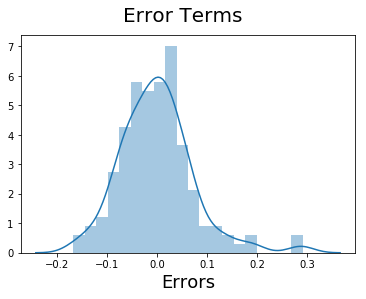

In [41]:
#plot the error terms using the model and the selected features 
#peak around 0 indicates model is good enough to be used on test data 
y_train_price = lm_9.predict(X_train_rfe_9)
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**list the features to be used and the constants in equation**

In [42]:
X_train_rfe_9.columns

Index(['const', 'carwidth', 'cylindernumber', 'boreratio', 'rear', 'rotor',
       'bmw', 'mitsubishi', 'peugeot', 'renault', 'subaru', 'toyota'],
      dtype='object')

In [43]:
lm_9.params

const            -0.286082
carwidth          0.588997
cylindernumber    0.570771
boreratio         0.209832
rear              0.449242
rotor             0.131092
bmw               0.237228
mitsubishi       -0.054099
peugeot          -0.090145
renault          -0.141053
subaru           -0.121052
toyota           -0.038190
dtype: float64

$price = 0.58 \times carwidth + + 0.57 \times cylindernumber + 0.2 \times boreratio + 0.44 \times rear + 0.13 \times rotor + 0.23 \times bmw - 0.054 \times mitsubishi - 0.0 \times peugeot - 0.14 \times renault - 0.12 \times subaru - 0.038 \times toyota$

In [44]:
#apply scaling on the test data 
col_to_scale_test = ['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[col_to_scale_test] = scaler.fit_transform(df_test[col_to_scale_test])

C:\Users\maddp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\maddp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [45]:
#separate x and y values from the scaled data set 
y_test = df_test.pop('price')
X_test = df_test

In [46]:
#select the finalized features from the test data set 
X_test_lm = X_test[['carwidth', 'cylindernumber', 'boreratio', 'rear', 'rotor', 'bmw', 'mitsubishi', 'peugeot', 'renault', 'subaru', 'toyota']]

In [47]:
# add a constant and predict the y values that is price based on the model 
X_test_lm = sm.add_constant(X_test_lm)
y_pred = lm_9.predict(X_test_lm)

Text(0,0.5,'y_pred')

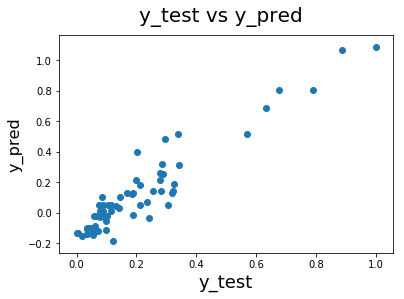

In [48]:
#plot the variace between y values predicted and y values that are already present in test data 
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

**The distribution on scatter plot shows that the model selected have fit well towards end and in middle little variance is seen**